In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("B777_e24_sample.csv")

/var/folders/0v/v4272sgs3_z11_8jnxqs585c0000gn/T/ipykernel_83020/3457504123.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("B777_e24_sample.csv")


# EDA

In [2]:
# Drop the 'FM' column from the dataframe
data = data.drop(columns=['FM'])

# Display the first few rows of the dataframe after dropping the column
data.head()

timestamp  ACID   DPT   DST   DATE   GMT  SER_NUM_L  \
0  2023-02-07T05:19:12.181Z  9917  KIAD  LFPG  20723   438      13302   
1  2023-02-07T05:37:29.610Z  1740  KSFO  RJAA  20623  2002      39768   
2  2023-02-07T05:53:16.508Z  9679  KSFO  PHNL  20723   531      41436   
3  2023-02-07T05:57:40.776Z  3309  KLAX  KEWR  20723   557      60650   
4  2023-02-07T05:58:47.285Z  8850  KIAD  EGLL  20723   209      61310   

   SER_NUM_R  EPR_L  EPR_R  ...  WFRQ_L  WFRQ_R  TRA_L  TRA_R   P2_L   P2_R  \
0      66207  1.105  1.105  ...    6305    5940   52.5   52.4  4.940  4.939   
1      62329  1.122  1.122  ...    8017    8270   54.3   54.3  6.317  6.326   
2      61348  1.120  1.120  ...    6386    6149   54.3   54.3  4.719  4.730   
3      86037  1.142  1.142  ...    7486    7834   54.1   54.1  5.376  5.369   
4      75179  1.230  1.230  ...    6838    6985   57.3   57.2  4.512  4.503   

   P2_5_L  P2_5_R   P5_L   P5_R  
0  16.256  16.192  5.481  5.460  
1  21.167  21.305  7.115  7.139  
2  15.596  16.034  5.364  5.366  
3  18.238  17.994  6.154  6.194  
4  16.387  16.266  5.620  5.572  

[5 rows x 30 columns]

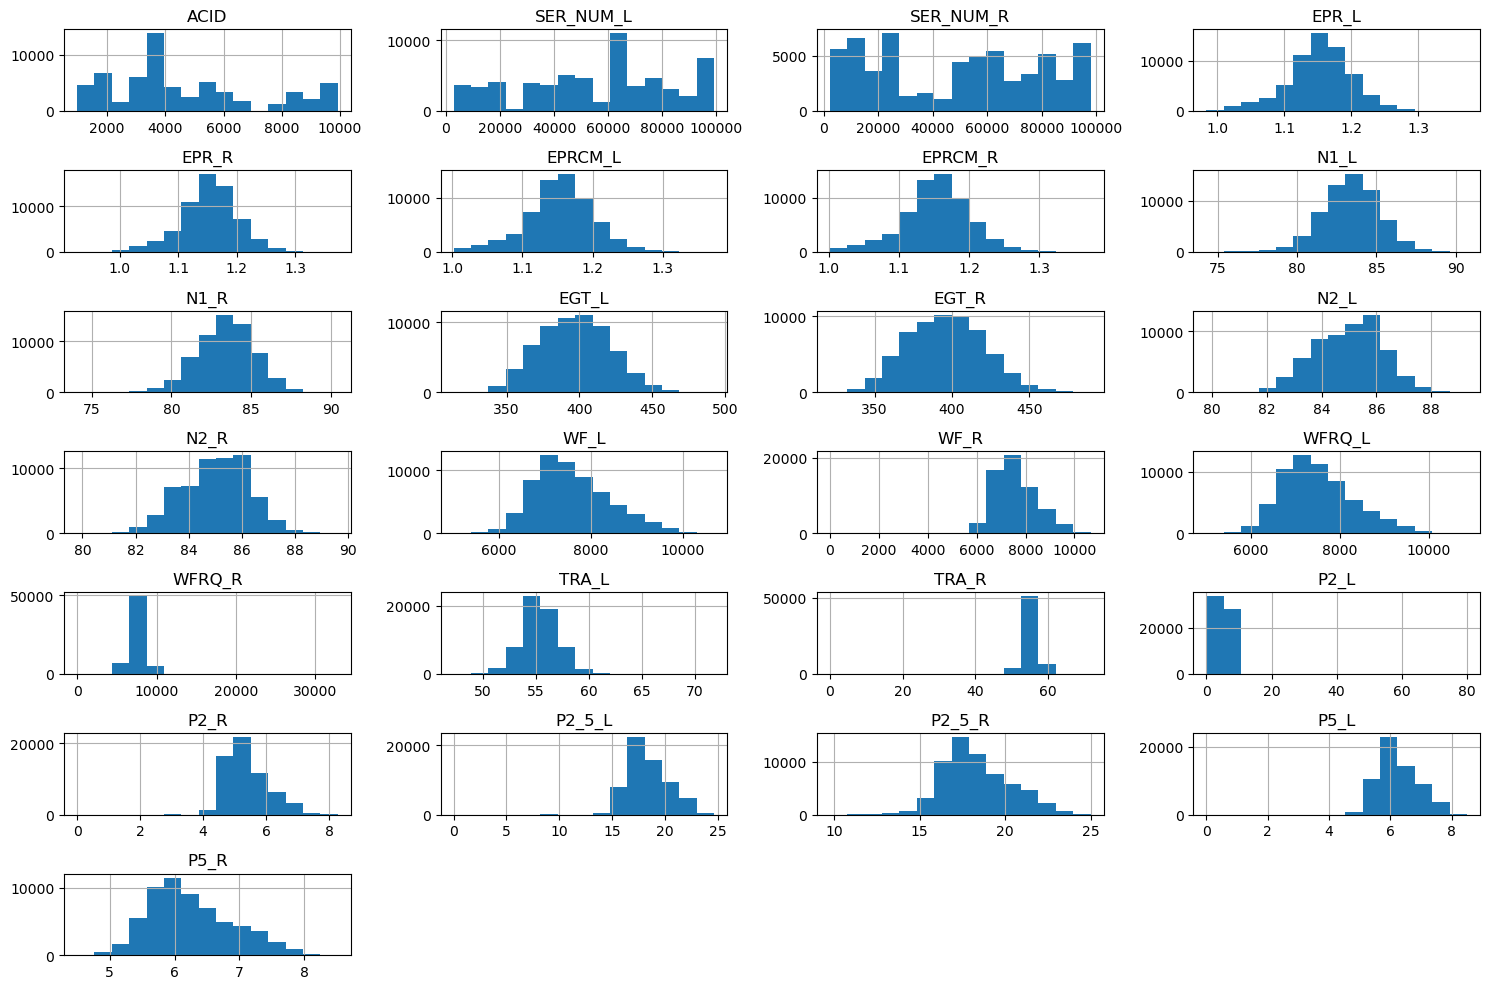

In [3]:
data['WF_R'] = pd.to_numeric(data['WF_R'], errors='coerce')
data['WFRQ_L'] = pd.to_numeric(data['WFRQ_L'], errors='coerce')
data['WFRQ_R'] = pd.to_numeric(data['WFRQ_R'], errors='coerce')

# Basic statistical summary
summary = data.describe()

# Plot histograms for all numerical data to check distributions
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(7, 4))
plt.tight_layout()
plt.show()

In [4]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# data = data.fillna(0)

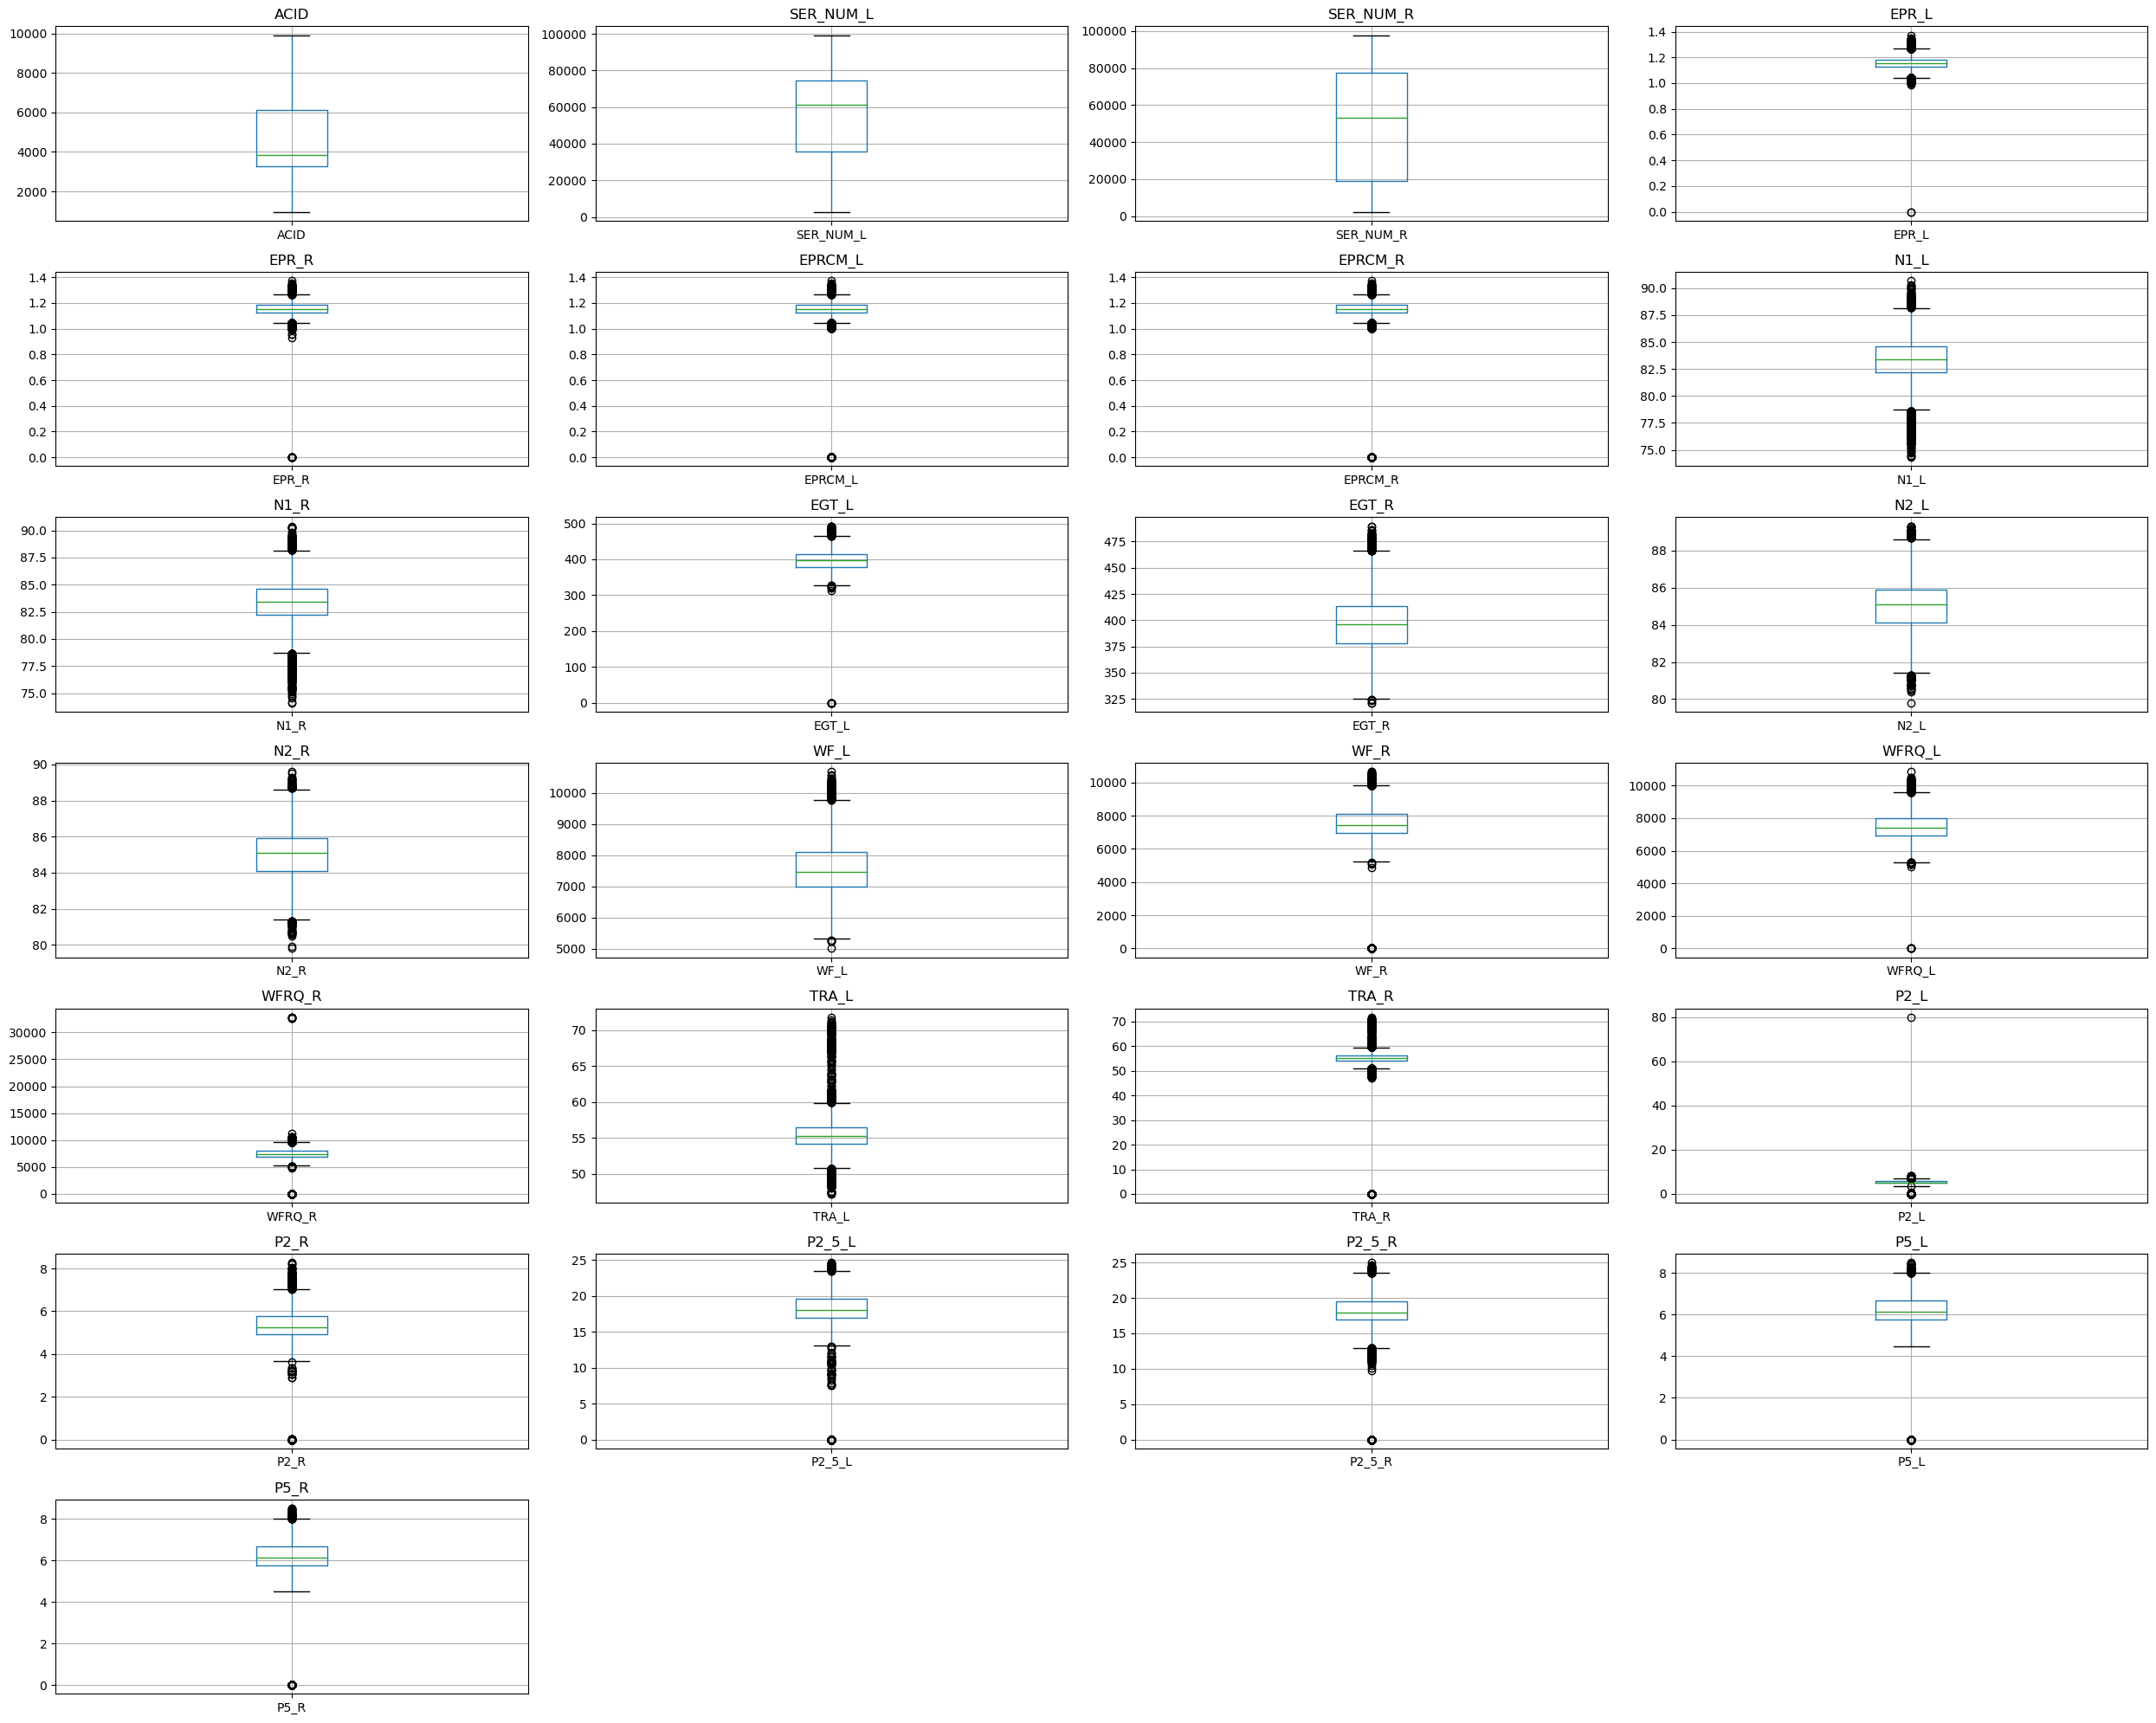

In [5]:
# Selecting numerical columns only
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

data = data.fillna(0)

# Plotting boxplots for each numerical column
plt.figure(figsize=(25, 20))
for index, column in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) + 3) // 4, 4, index + 1)  # Adjusting subplot grid
    data.boxplot(column=column)
    plt.title(column)
    plt.tight_layout()

plt.show()

In [6]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

data = data.sort_values(by='timestamp').reset_index(drop=True)

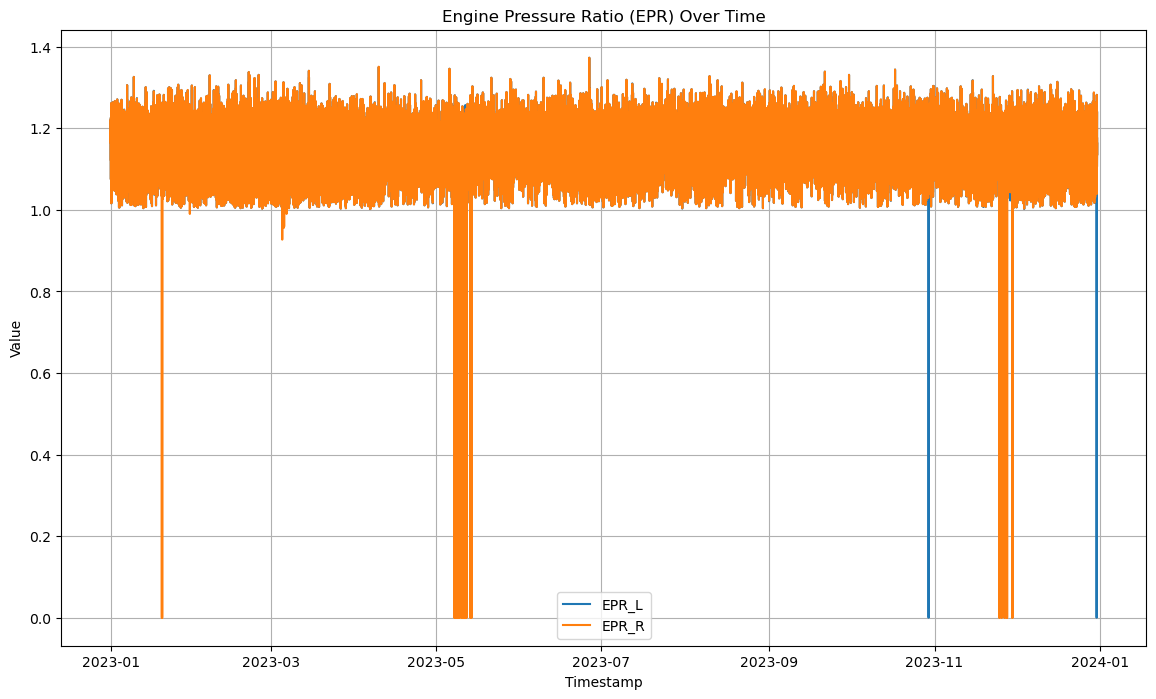

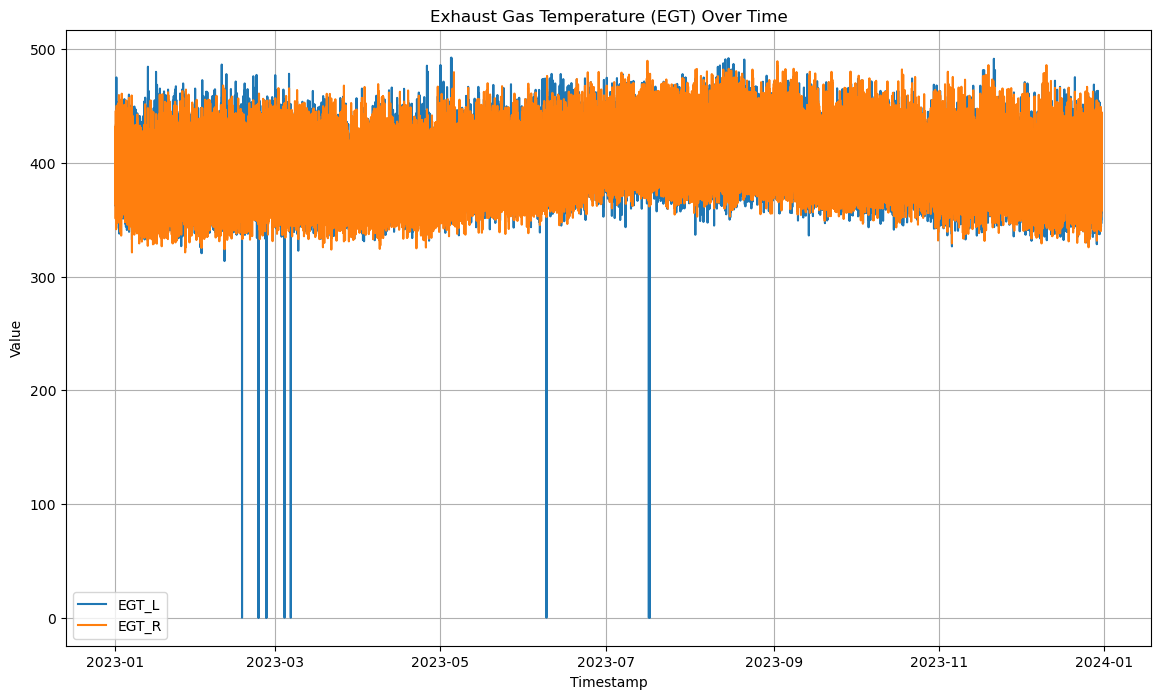

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

data = data.sort_values(by='timestamp').reset_index(drop=True)

def plot_time_series(data, columns, title):
    plt.figure(figsize=(14, 8))
    for column in columns:
        plt.plot(data['timestamp'], data[column], label=column)
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

plot_time_series(data, ['EPR_L', 'EPR_R'], 'Engine Pressure Ratio (EPR) Over Time')
# plot_time_series(data, ['EPRCM_L', 'EPRCM_R'], 'Engine Pressure Ratio Corrected (EPRCM) Over Time')
# plot_time_series(data, ['N1_L', 'N1_R'], 'Fan Speed (N1) Over Time')
plot_time_series(data, ['EGT_L', 'EGT_R'], 'Exhaust Gas Temperature (EGT) Over Time')
# plot_time_series(data, ['N2_L', 'N2_R'], 'Core Engine Speed (N2) Over Time')
# plot_time_series(data, ['WF_L', 'WF_R'], 'Fuel Flow (WF) Over Time')
# plot_time_series(data, ['WFRQ_L', 'WFRQ_R'], 'Fuel Flow Rate (WFRQ) Over Time')
# plot_time_series(data, ['TRA_L', 'TRA_R'], 'Thrust Angle (TRA) Over Time')
# plot_time_series(data, ['P2_L', 'P2_R'], 'Pressure at station 2 (P2) Over Time')
# plot_time_series(data, ['P2_5_L', 'P2_5_R'], 'Pressure at station 2.5 (P2_5) Over Time')
# plot_time_series(data, ['P5_L', 'P5_R'], 'Pressure at station 5 (P5) Over Time')

### **Group By Aircraft (ACID)**

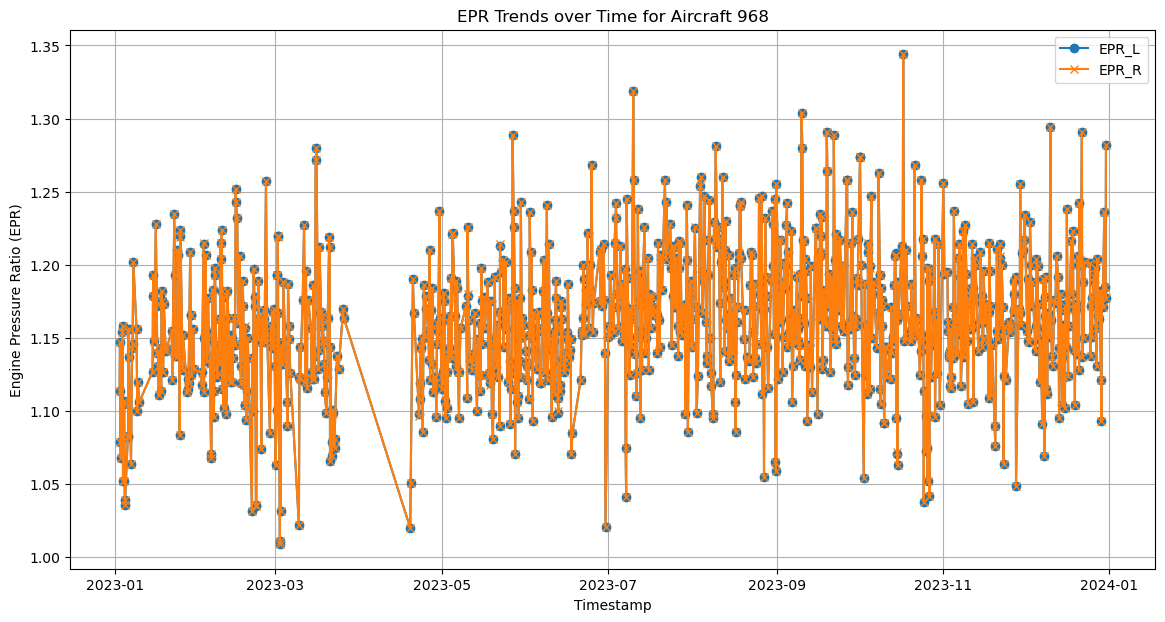

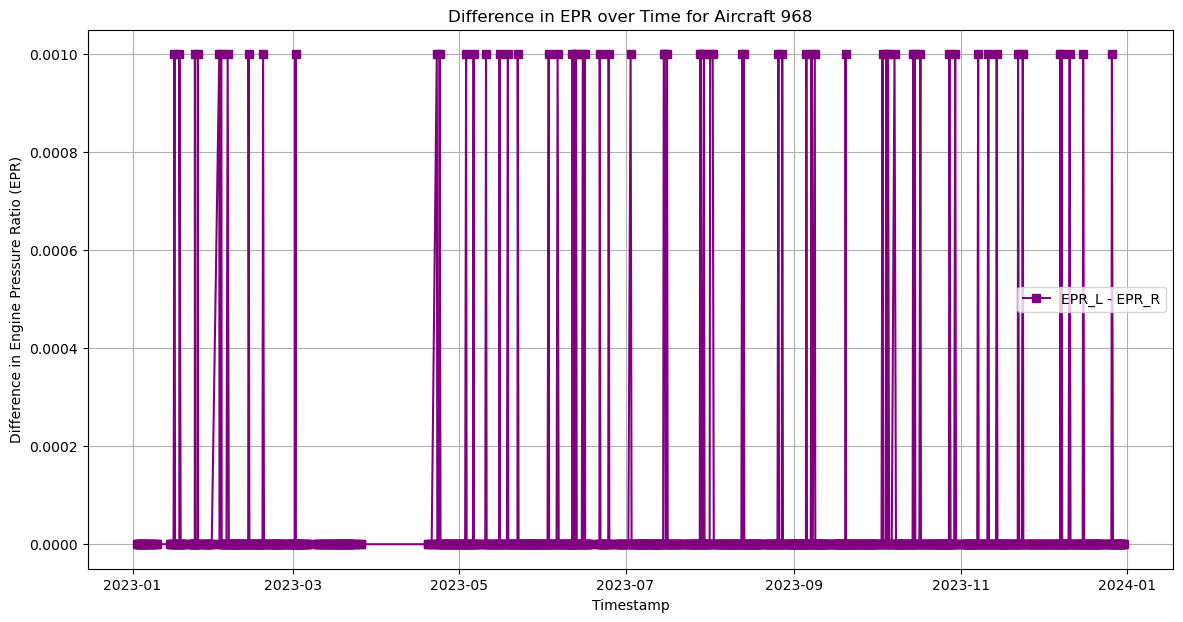

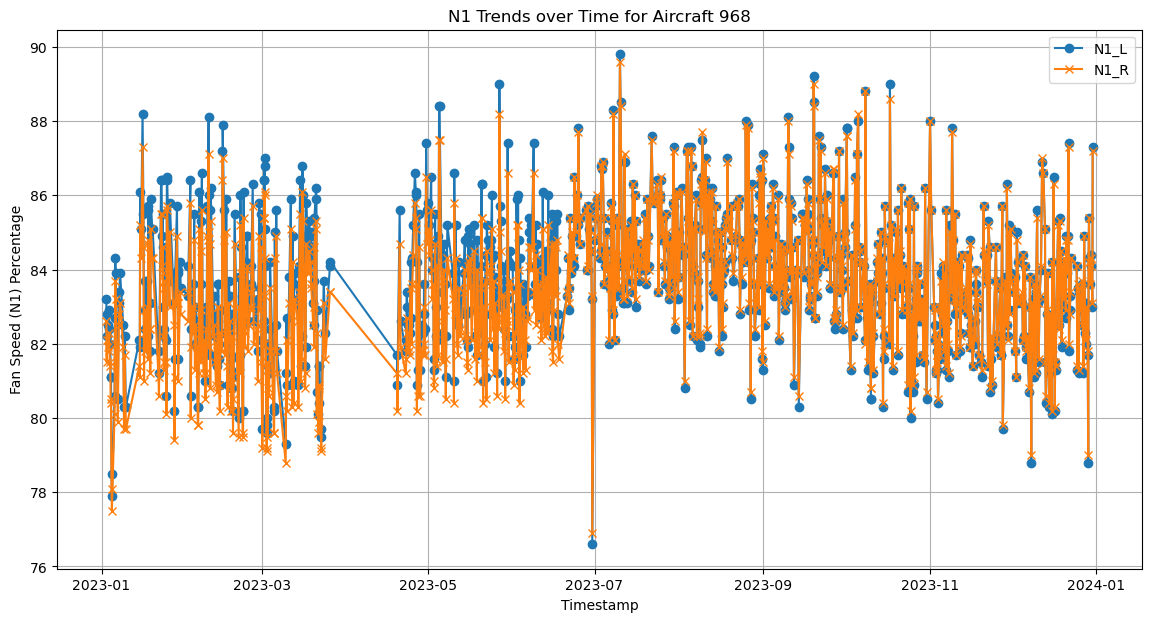

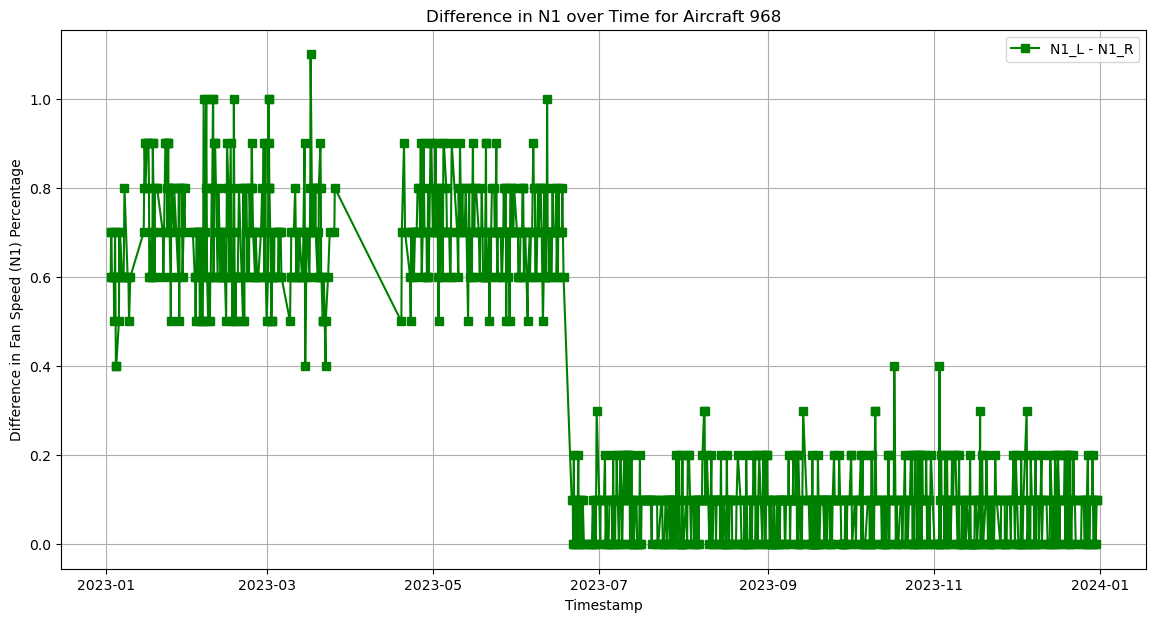

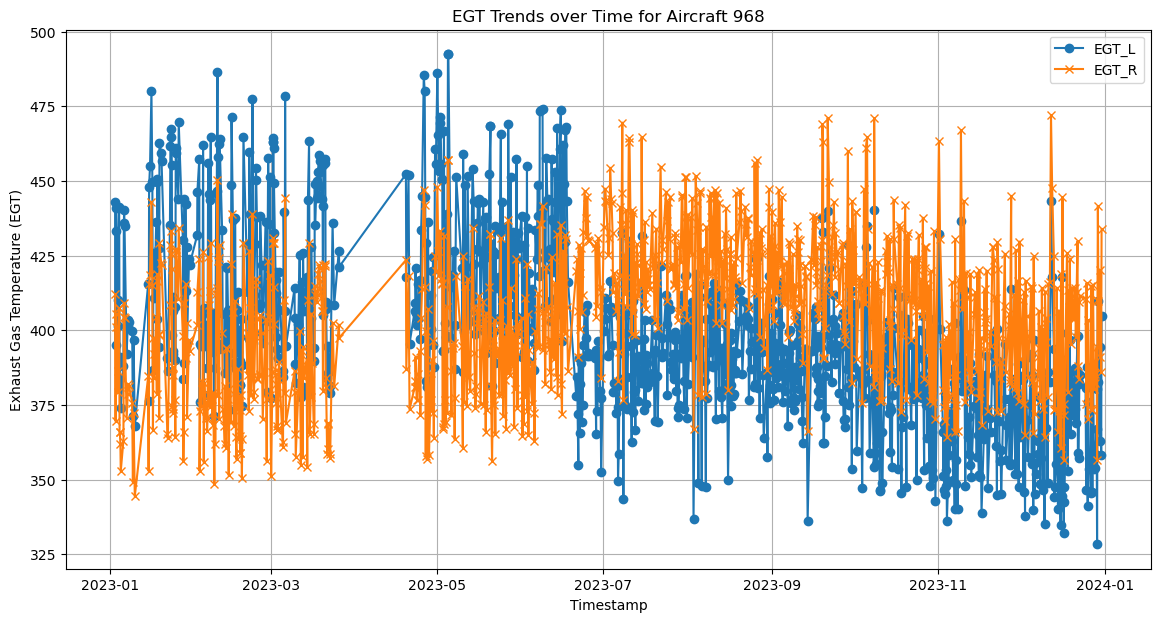

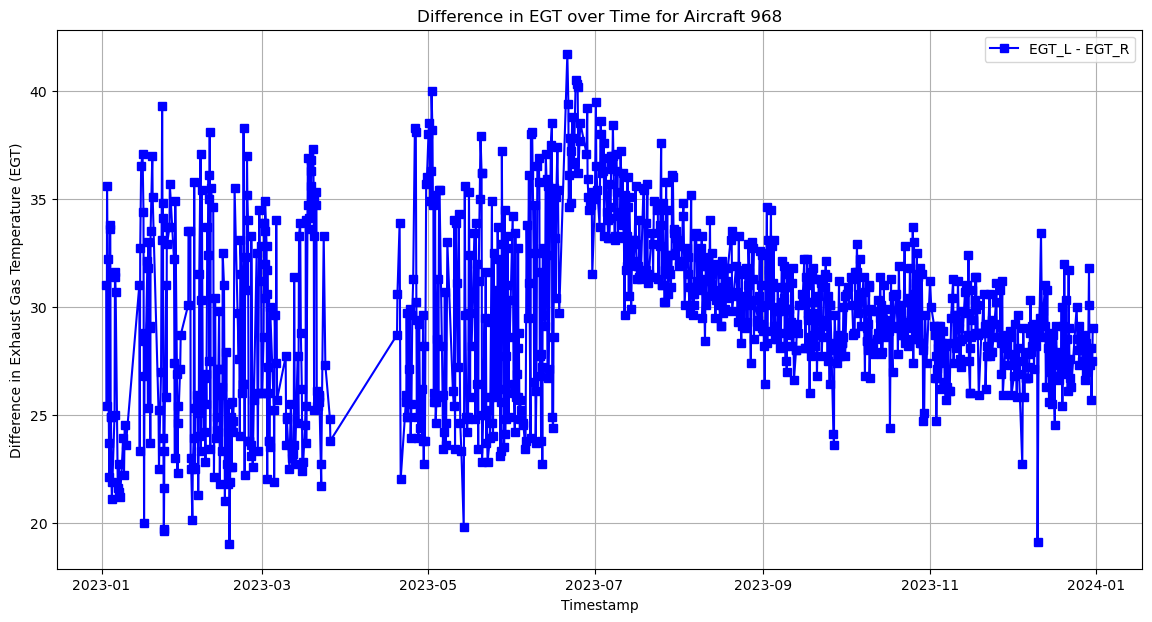

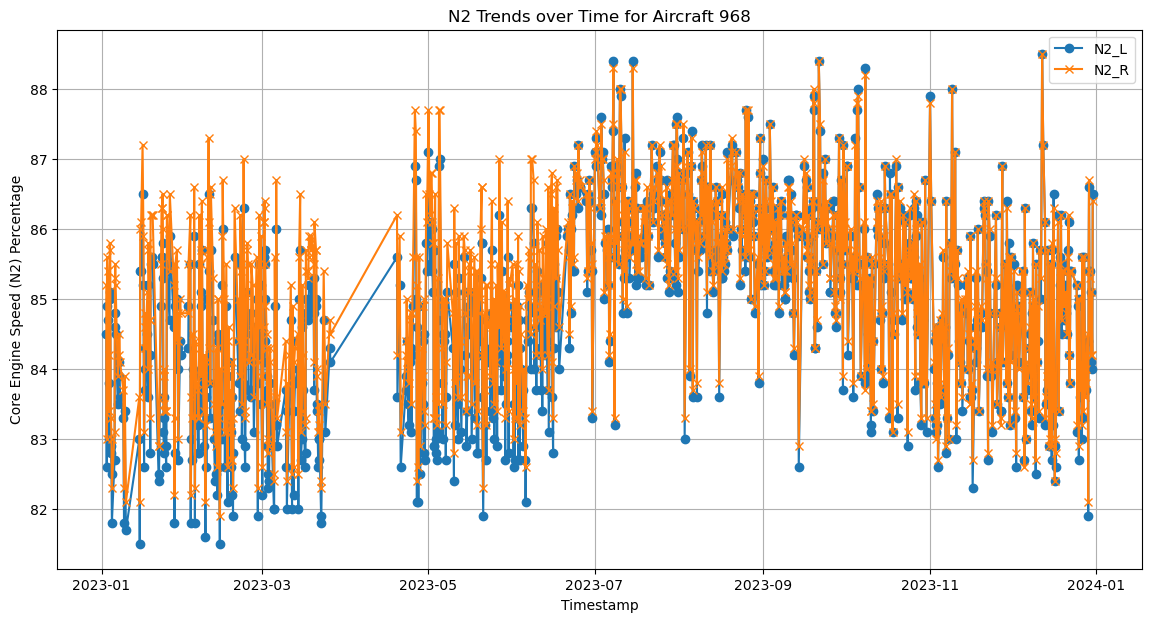

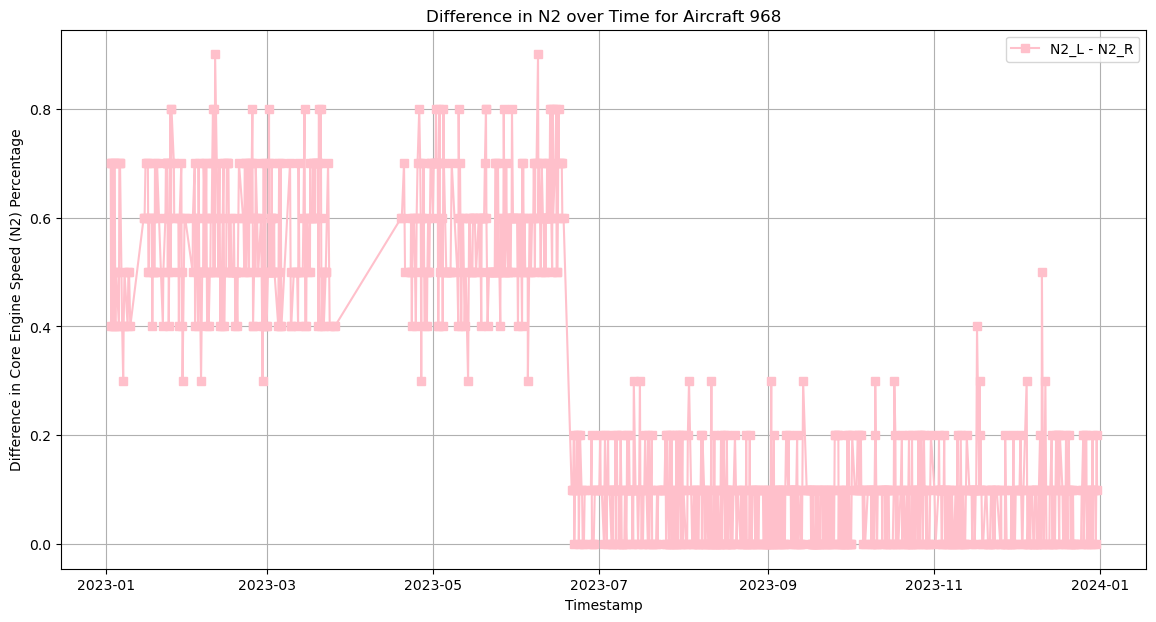

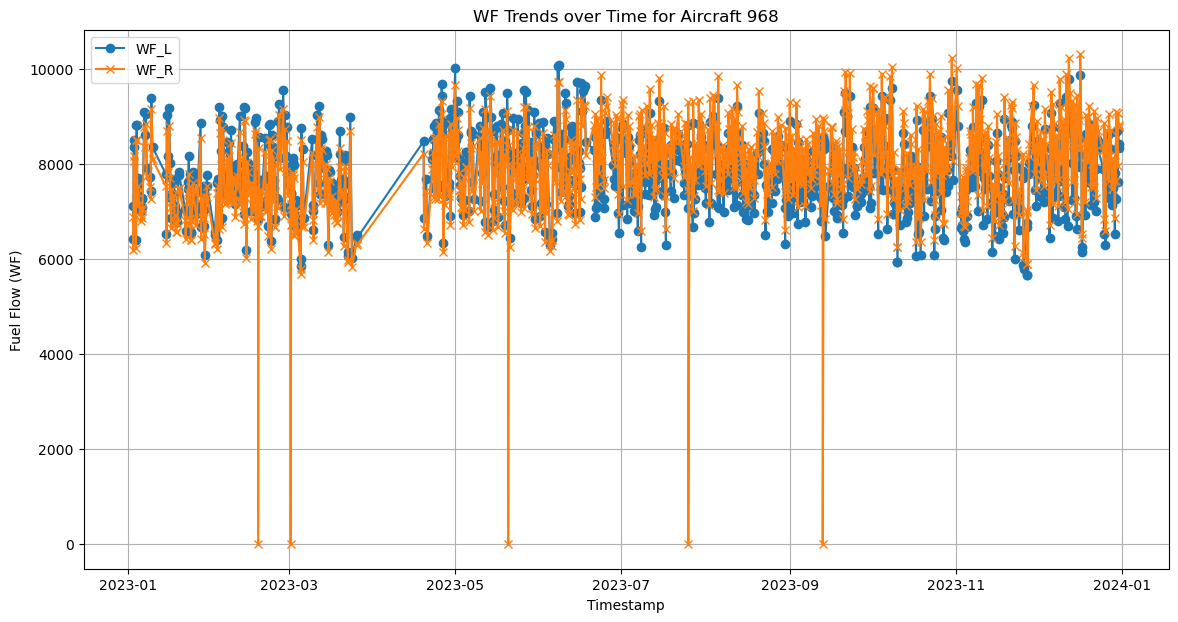

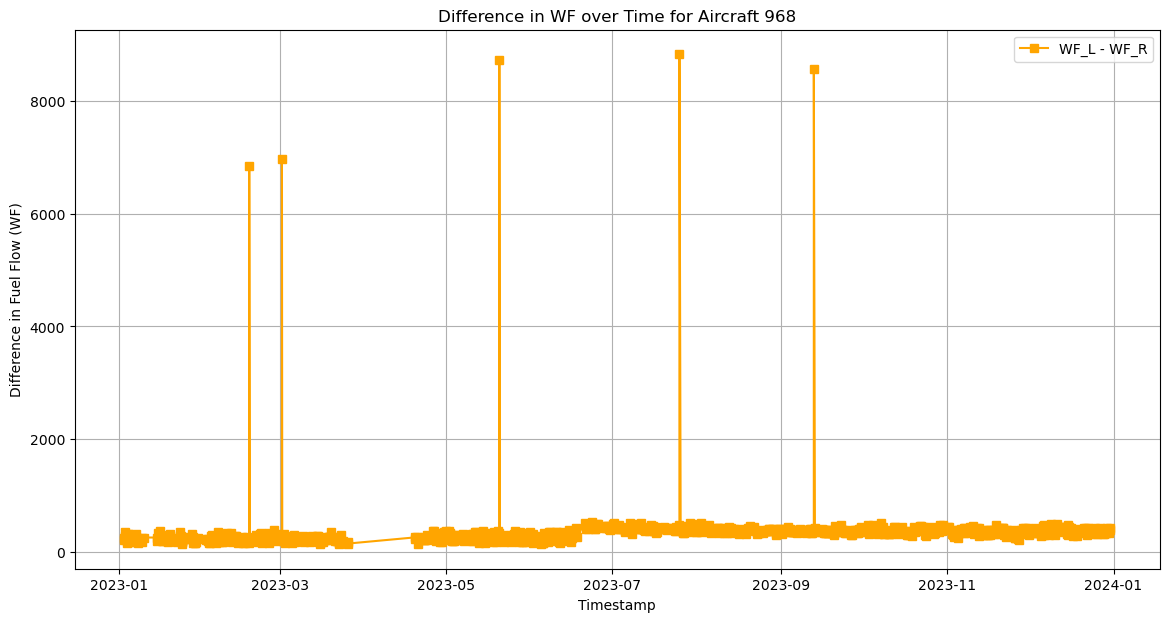

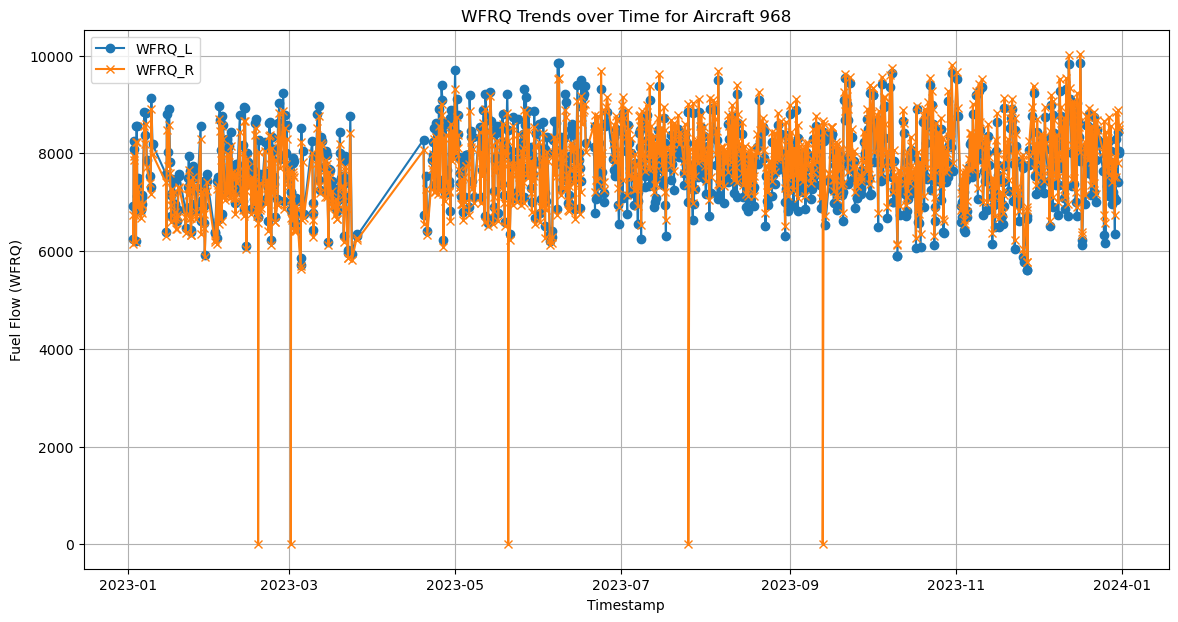

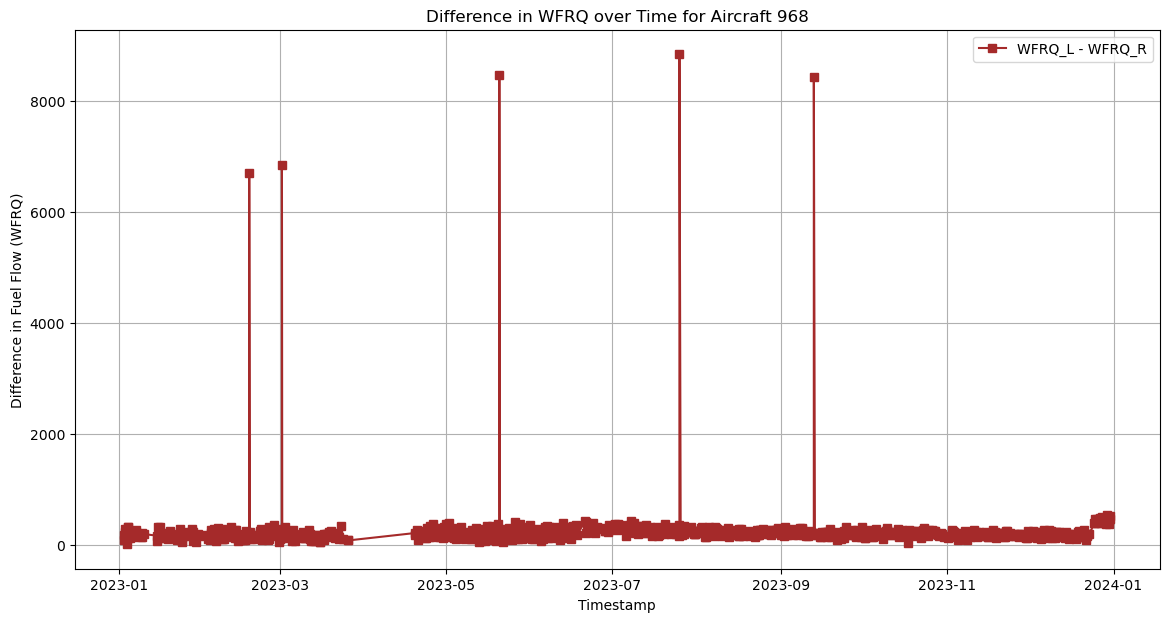

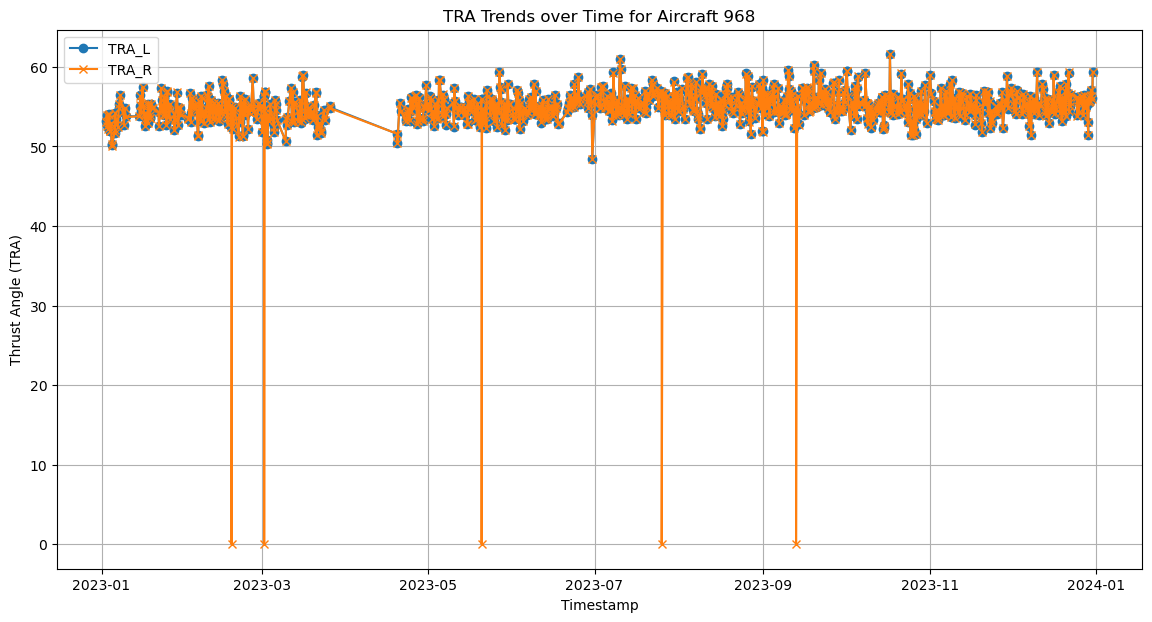

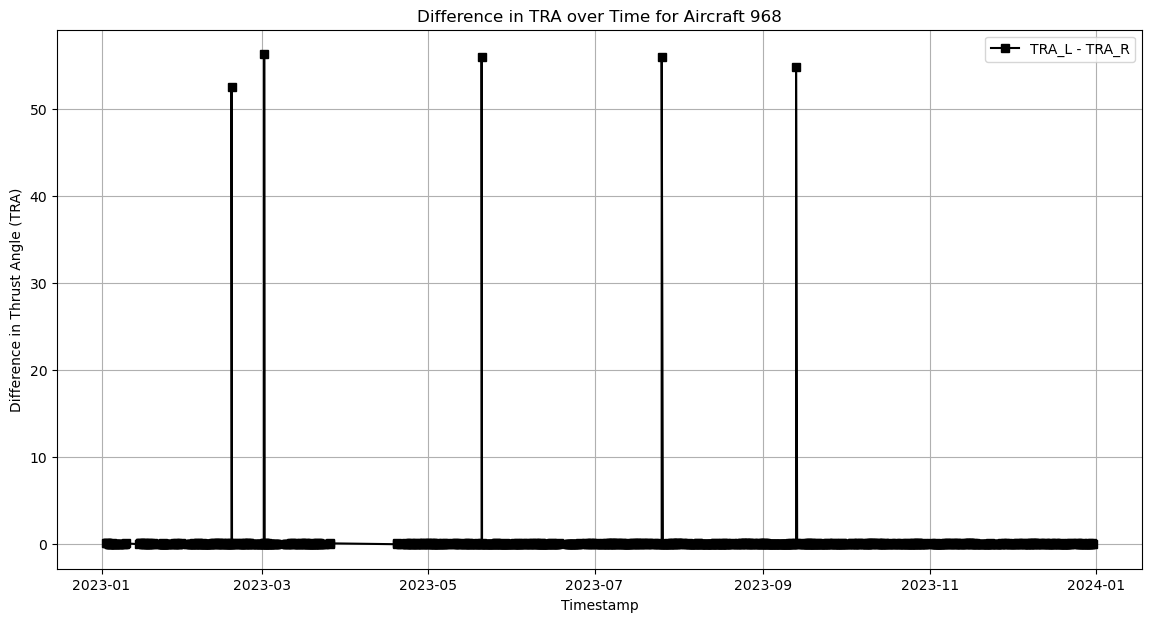

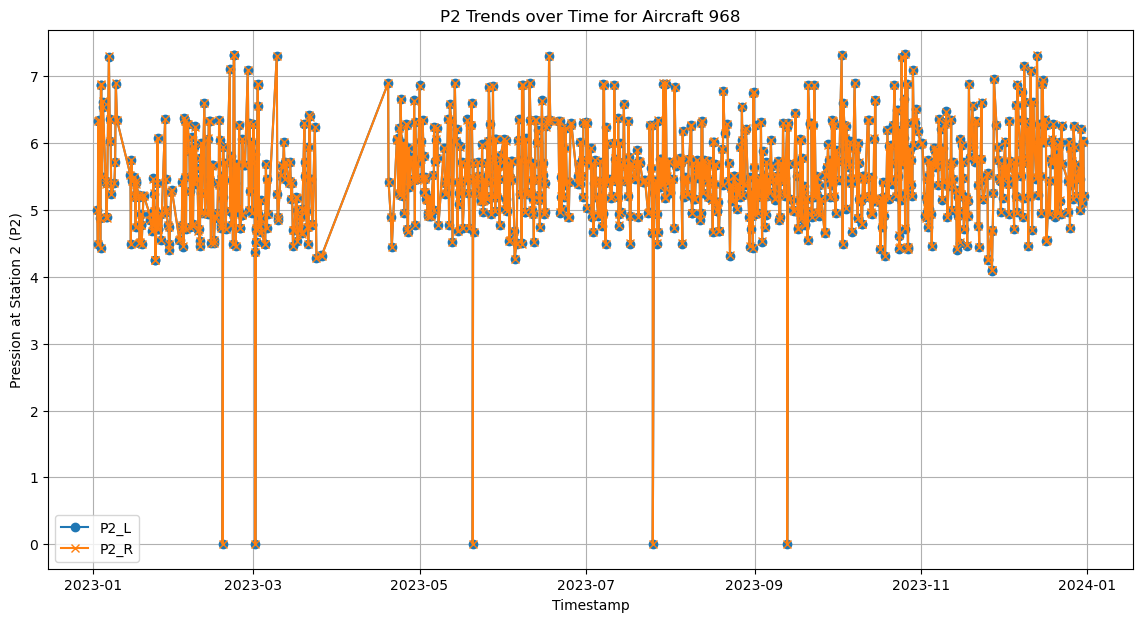

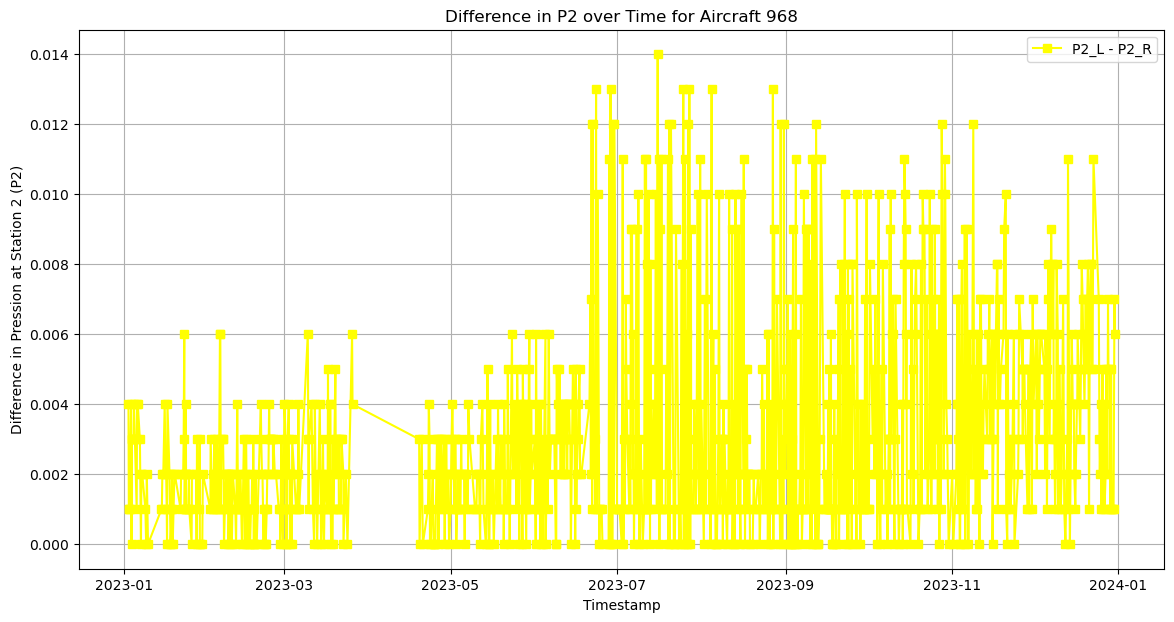

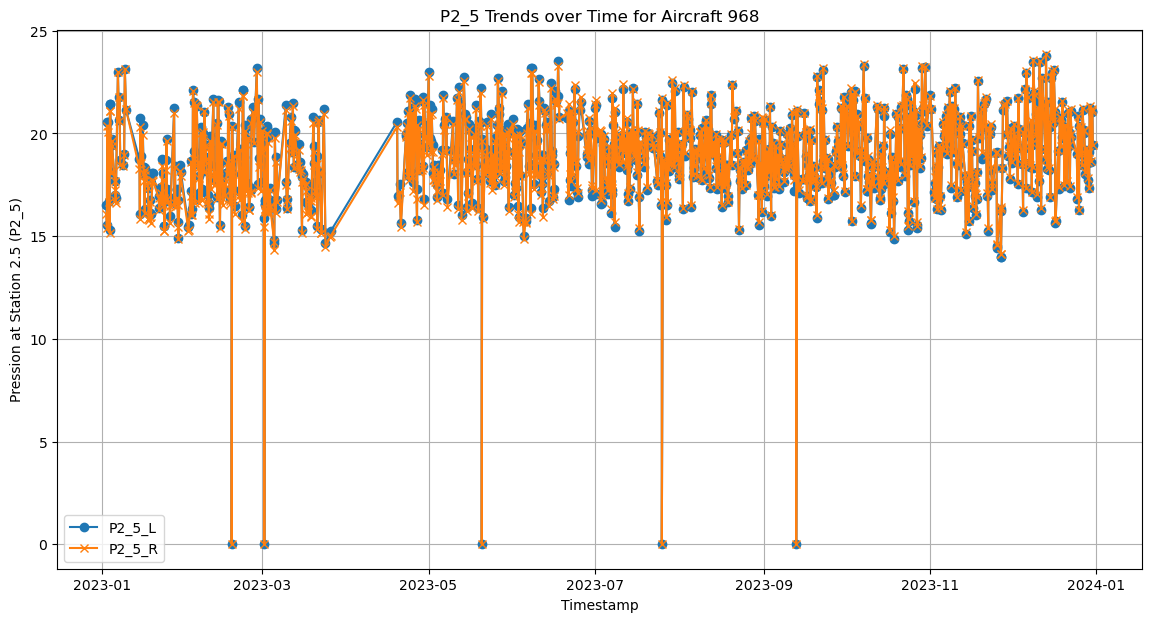

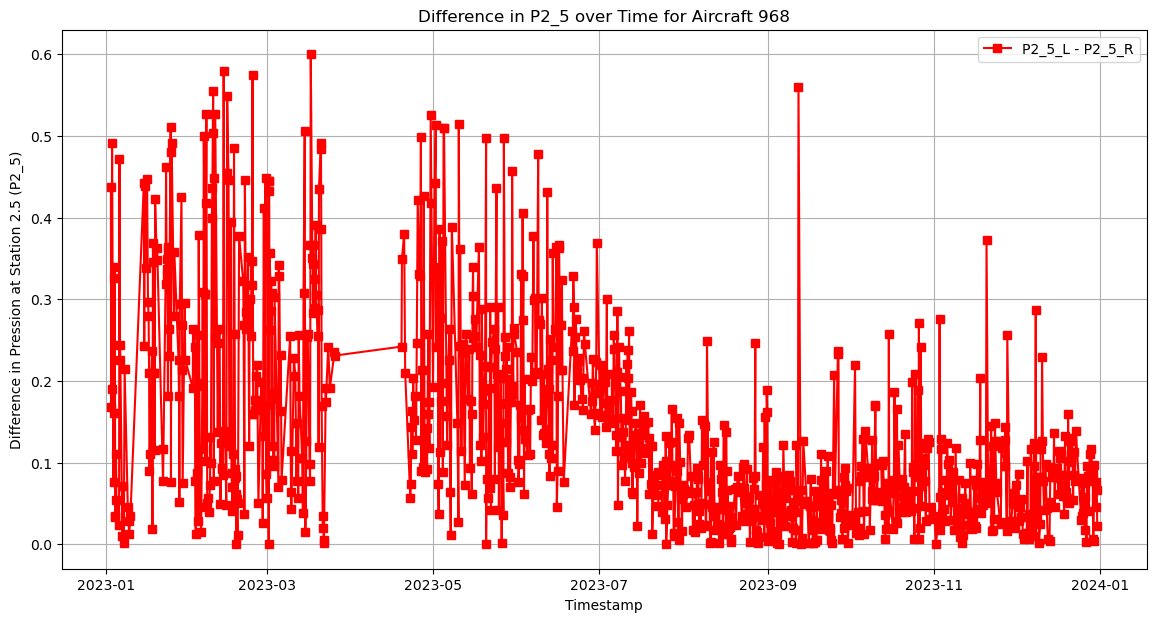

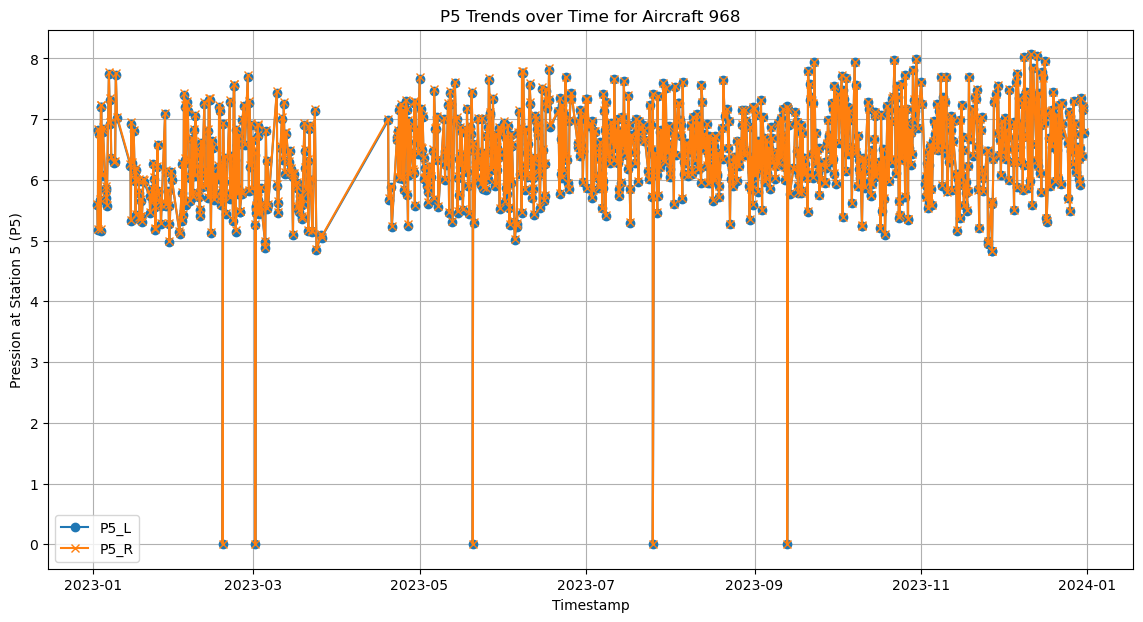

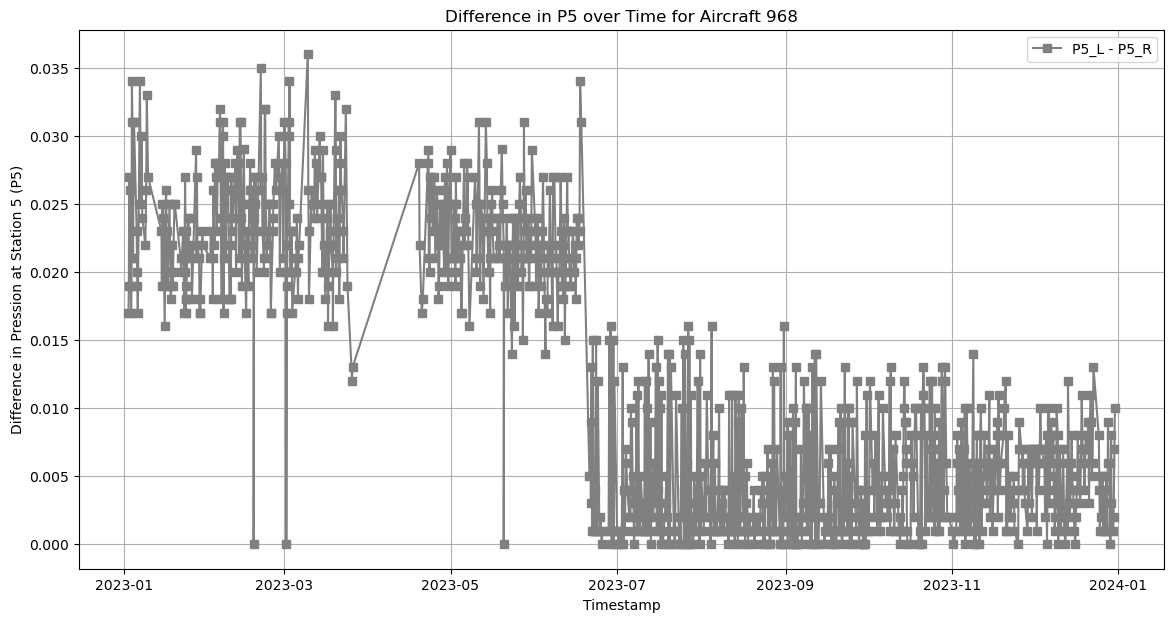

In [8]:
plot_count = 0
grouped = data.groupby('ACID')

for acid, group in grouped:
    group = group.sort_values('timestamp')

    # EPR
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['EPR_L'], label='EPR_L', marker='o')
    plt.plot(group['timestamp'], group['EPR_R'], label='EPR_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Engine Pressure Ratio (EPR)')
    plt.title(f'EPR Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    group['EPR_Diff'] = abs(group['EPR_L'] - group['EPR_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['EPR_Diff'], label='EPR_L - EPR_R', color='purple', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Engine Pressure Ratio (EPR)')
    plt.title(f'Difference in EPR over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # N1
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['N1_L'], label='N1_L', marker='o')
    plt.plot(group['timestamp'], group['N1_R'], label='N1_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Fan Speed (N1) Percentage')
    plt.title(f'N1 Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    group['N1_Diff'] = abs(group['N1_L'] - group['N1_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['N1_Diff'], label='N1_L - N1_R', color='green', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Fan Speed (N1) Percentage')
    plt.title(f'Difference in N1 over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # EGT
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['EGT_L'], label='EGT_L', marker='o')
    plt.plot(group['timestamp'], group['EGT_R'], label='EGT_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Exhaust Gas Temperature (EGT)')
    plt.title(f'EGT Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    group['EGT_Diff'] = abs(group['EGT_L'] - group['EGT_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['EGT_Diff'], label='EGT_L - EGT_R', color='blue', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Exhaust Gas Temperature (EGT)')
    plt.title(f'Difference in EGT over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # N2
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['N2_L'], label='N2_L', marker='o')
    plt.plot(group['timestamp'], group['N2_R'], label='N2_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Core Engine Speed (N2) Percentage')
    plt.title(f'N2 Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    group['N2_Diff'] = abs(group['N2_L'] - group['N2_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['N2_Diff'], label='N2_L - N2_R', color='pink', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Core Engine Speed (N2) Percentage')
    plt.title(f'Difference in N2 over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # WF
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['WF_L'], label='WF_L', marker='o')
    plt.plot(group['timestamp'], group['WF_R'], label='WF_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Fuel Flow (WF)')
    plt.title(f'WF Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    group['WF_Diff'] = abs(group['WF_L'] - group['WF_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['WF_Diff'], label='WF_L - WF_R', color='orange', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Fuel Flow (WF)')
    plt.title(f'Difference in WF over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # WFRQ
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['WFRQ_L'], label='WFRQ_L', marker='o')
    plt.plot(group['timestamp'], group['WFRQ_R'], label='WFRQ_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Fuel Flow (WFRQ)')
    plt.title(f'WFRQ Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    group['WFRQ_Diff'] = abs(group['WFRQ_L'] - group['WFRQ_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['WFRQ_Diff'], label='WFRQ_L - WFRQ_R', color='brown', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Fuel Flow (WFRQ)')
    plt.title(f'Difference in WFRQ over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # TRA
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['TRA_L'], label='TRA_L', marker='o')
    plt.plot(group['timestamp'], group['TRA_R'], label='TRA_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Thrust Angle (TRA)')
    plt.title(f'TRA Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    group['TRA_Diff'] = abs(group['TRA_L'] - group['TRA_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['TRA_Diff'], label='TRA_L - TRA_R', color='black', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Thrust Angle (TRA)')
    plt.title(f'Difference in TRA over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    #P2
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['P2_L'], label='P2_L', marker='o')
    plt.plot(group['timestamp'], group['P2_R'], label='P2_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Pression at Station 2 (P2)')
    plt.title(f'P2 Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    group['P2_Diff'] = abs(group['P2_L'] - group['P2_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['P2_Diff'], label='P2_L - P2_R', color='yellow', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Pression at Station 2 (P2)')
    plt.title(f'Difference in P2 over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    #P2_5
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['P2_5_L'], label='P2_5_L', marker='o')
    plt.plot(group['timestamp'], group['P2_5_R'], label='P2_5_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Pression at Station 2.5 (P2_5)')
    plt.title(f'P2_5 Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    group['P2_5_Diff'] = abs(group['P2_5_L'] - group['P2_5_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['P2_5_Diff'], label='P2_5_L - P2_5_R', color='red', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Pression at Station 2.5 (P2_5)')
    plt.title(f'Difference in P2_5 over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # P5
    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['P5_L'], label='P5_L', marker='o')
    plt.plot(group['timestamp'], group['P5_R'], label='P5_R', marker='x')
    plt.xlabel('Timestamp')
    plt.ylabel('Pression at Station 5 (P5)')
    plt.title(f'P5 Trends over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    group['P5_Diff'] = abs(group['P5_L'] - group['P5_R'])

    plt.figure(figsize=(14, 7))
    plt.plot(group['timestamp'], group['P5_Diff'], label='P5_L - P5_R', color='grey', marker='s')
    plt.xlabel('Timestamp')
    plt.ylabel('Difference in Pression at Station 5 (P5)')
    plt.title(f'Difference in P5 over Time for Aircraft {acid}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plot_count += 1
        
        # Break the loop after 2 plots
    if plot_count >= 1:
            break
    if plot_count >= 1:
        break


# Remove Seasonality

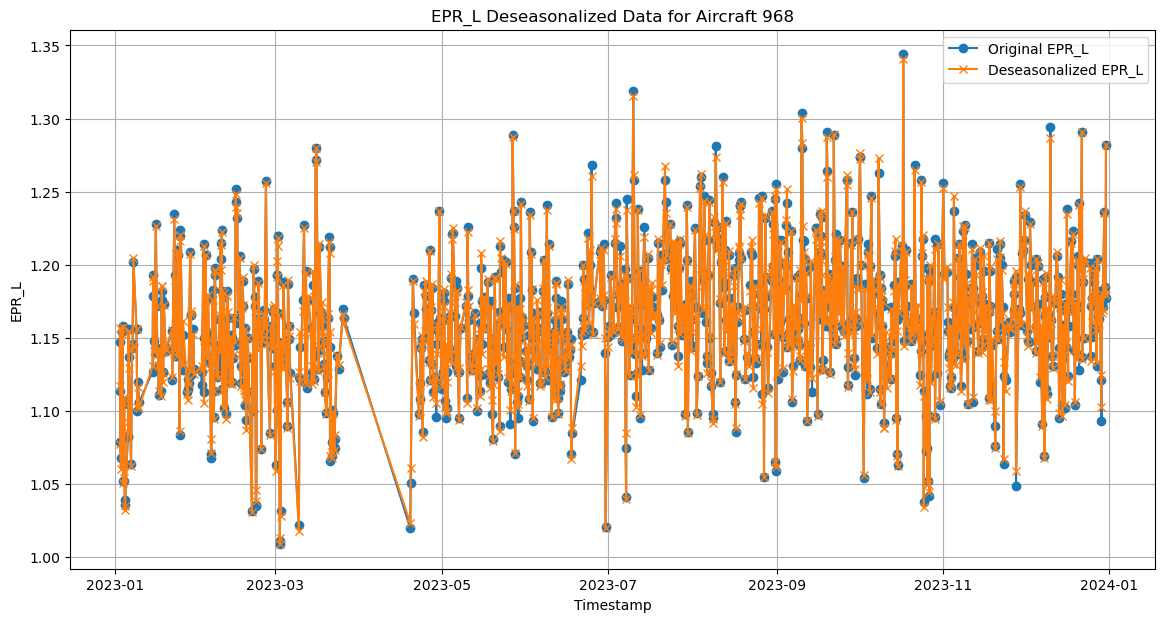

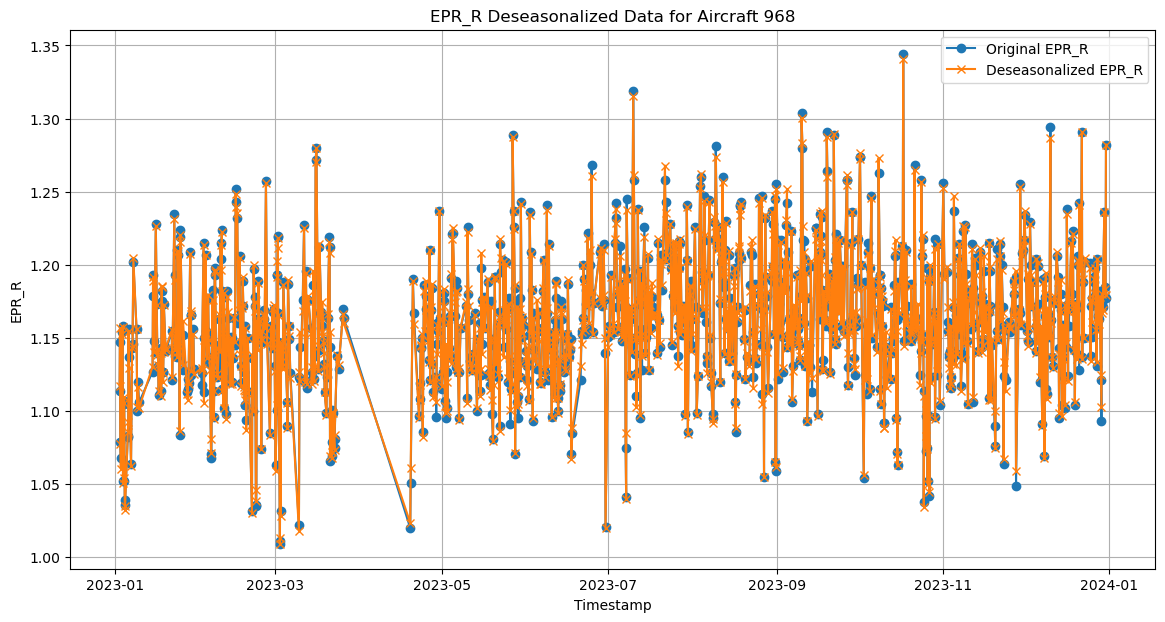

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
plot_count = 0
for acid, group in grouped:
    group = group.sort_values('timestamp')
    group.set_index('timestamp', inplace=True)

    variables = ['EPR_L', 'EPR_R', 'N1_L', 'N1_R', 'EGT_L', 'EGT_R', 'N2_L', 'N2_R', 'WF_L', 'WF_R', 'WFRQ_L', 'WFRQ_R', 'TRA_L', 'TRA_R', 'P2_L', 'P2_R', 'P2_5_L', 'P2_5_R', 'P5_L', 'P5_R']
    
    # Remove seasonality for each variable
    for var in variables:
        # Perform time series decomposition with a period of 365 days
        decomposition = seasonal_decompose(group[var], model='additive', period=12)
        
        # Remove the seasonal component
        group[f'{var}_deseasonalized'] = group[var] - decomposition.seasonal
        
        # Plot original and deseasonalized data
        plt.figure(figsize=(14, 7))
        plt.plot(group.index, group[var], label=f'Original {var}', marker='o')
        plt.plot(group.index, group[f'{var}_deseasonalized'], label=f'Deseasonalized {var}', marker='x')
        plt.xlabel('Timestamp')
        plt.ylabel(var)
        plt.title(f'{var} Deseasonalized Data for Aircraft {acid}')
        plt.legend()
        plt.grid(True)
        plt.show()
        plot_count += 1
        
        # Break the loop after 2 plots
        if plot_count >= 2:
            break
    if plot_count >= 2:
        break


# Group by Aircraft (ACID) - Distribution, identify threshold

In [ ]:
# plot_count = 0
# for acid, group in grouped:
#     # Sort the group by timestamp
#     group = group.sort_values('timestamp')
    
#     variables = ['EPR_L', 'EPR_R', 'N1_L', 'N1_R', 'EGT_L', 'EGT_R', 'N2_L', 'N2_R', 'WF_L', 'WF_R', 'WFRQ_L', 'WFRQ_R', 'TRA_L', 'TRA_R', 'P2_L', 'P2_R', 'P2_5_L', 'P2_5_R', 'P5_L', 'P5_R']
    
#     # Draw distribution for each variable
#     for var in variables:
#         plt.figure(figsize=(14, 7))
#         plt.hist(group[var], bins=50, alpha=0.7, label=var)
#         plt.xlabel(var)
#         plt.ylabel('Frequency')
#         plt.title(f'{var} Distribution for Aircraft {acid}')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

#         plot_count += 1
#         if plot_count >= 10:
#             break
#     if plot_count >=10:
#         break
    

# Use Central Limit Theory to identify 95% normal range

In [ ]:
# for acid, group in grouped:
#     group = group.sort_values('timestamp')
#     group.set_index('timestamp', inplace=True)
    
#     # Define variables to analyze
#     variables = ['EPR_L', 'EPR_R', 'N1_L', 'N1_R', 'EGT_L', 'EGT_R', 'N2_L', 'N2_R', 'WF_L', 'WF_R', 'WFRQ_L', 'WFRQ_R', 'TRA_L', 'TRA_R', 'P2_L', 'P2_R', 'P2_5_L', 'P2_5_R', 'P5_L', 'P5_R']
    
#     # Calculate mean and standard deviation for each variable
#     stats = group[variables].agg(['mean', 'std'])
    
#     # Plot trends over time for each variable with 95% range
#     for var in variables:
#         mean = stats.at['mean', var]
#         std = stats.at['std', var]
#         lower_bound = mean - 2 * std
#         upper_bound = mean + 2 * std
        
#         plt.figure(figsize=(14, 7))
#         plt.plot(group.index, group[var], label=var, marker='o')
#         plt.axhline(mean, color='green', linestyle='--', label='Mean')
#         plt.axhline(lower_bound, color='red', linestyle='--', label='Lower 95% Bound')
#         plt.axhline(upper_bound, color='red', linestyle='--', label='Upper 95% Bound')
#         plt.xlabel('Timestamp')
#         plt.ylabel(var)
#         plt.title(f'{var} Trends over Time for Aircraft {acid}')
#         plt.legend()
#         plt.grid(True)
#         plt.show()
    
#     # Draw distribution for each variable with 95% range
#     for var in variables:
#         mean = stats.at['mean', var]
#         std = stats.at['std', var]
#         lower_bound = mean - 2 * std
#         upper_bound = mean + 2 * std
        
#         plt.figure(figsize=(14, 7))
#         plt.hist(group[var], bins=50, alpha=0.7, label=var)
#         plt.axvline(mean, color='green', linestyle='--', label='Mean')
#         plt.axvline(lower_bound, color='red', linestyle='--', label='Lower 95% Bound')
#         plt.axvline(upper_bound, color='red', linestyle='--', label='Upper 95% Bound')
#         plt.xlabel(var)
#         plt.ylabel('Frequency')
#         plt.title(f'{var} Distribution for Aircraft {acid}')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

# Use Central Limit Theory to identify 99.7% normal range

In [ ]:
count_plot = 0
for acid, group in grouped:
    group = group.sort_values('timestamp')
    group.set_index('timestamp', inplace=True)
    
    # Define variables to analyze
    variables = ['EPR_L', 'EPR_R', 'N1_L', 'N1_R', 'EGT_L', 'EGT_R', 'N2_L', 'N2_R', 'WF_L', 'WF_R', 'WFRQ_L', 'WFRQ_R', 'TRA_L', 'TRA_R', 'P2_L', 'P2_R', 'P2_5_L', 'P2_5_R', 'P5_L', 'P5_R']
    
    # Calculate mean and standard deviation for each variable
    stats = group[variables].agg(['mean', 'std'])
    
    # Plot trends over time for each variable with 95% range
    for var in variables:
        mean = stats.at['mean', var]
        std = stats.at['std', var]
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        
        plt.figure(figsize=(14, 7))
        plt.plot(group.index, group[var], label=var, marker='o')
        plt.axhline(mean, color='green', linestyle='--', label='Mean')
        plt.axhline(lower_bound, color='red', linestyle='--', label='Lower 99.7% Bound')
        plt.axhline(upper_bound, color='red', linestyle='--', label='Upper 99.7% Bound')
        plt.xlabel('Timestamp')
        plt.ylabel(var)
        plt.title(f'{var} Trends over Time for Aircraft {acid}')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        count_plot += 1
        if count_plot >= 2:
            break
    if count_plot >= 2: 
        break
    # Draw distribution for each variable with 95% range
    #for var in variables:
        #mean = stats.at['mean', var]
        #std = stats.at['std', var]
        #lower_bound = mean - 2 * std
        #upper_bound = mean + 2 * std
        
        #plt.figure(figsize=(14, 7))
        #plt.hist(group[var], bins=50, alpha=0.7, label=var)
        #plt.axvline(mean, color='green', linestyle='--', label='Mean')
        #plt.axvline(lower_bound, color='red', linestyle='--', label='Lower 99.7% Bound')
        #plt.axvline(upper_bound, color='red', linestyle='--', label='Upper 99.7% Bound')
        #plt.xlabel(var)
        #plt.ylabel('Frequency')
        #plt.title(f'{var} Distribution for Aircraft {acid}')
        #plt.legend()
        #plt.grid(True)
        #plt.show()